# Load Package and data

In [3]:
# Import necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.metrics import precision_recall_curve

ModuleNotFoundError: No module named 'xgboost'

In [2]:
# Load the data
df = pd.read_csv('Data_Leakage_Detection.csv')

# EDA

In [3]:
df.head(10)

,id,date,user,pc,Authority,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,External Destination,File Operation,Data Sensitivity Level,Abnormality
0,1,07-10-14 0:54,User_0971,PC_0258,manager,0.0,0.0,1.0,0.0,0.0,1.0,internal,move,low,0
1,2,02-01-13 18:08,User_0208,PC_0307,staff,1.0,0.0,0.0,1.0,0.0,0.0,external,write,low,1
2,3,08-08-11 20:31,User_0265,PC_0259,manager,0.0,0.0,1.0,1.0,0.0,1.0,internal,write,low,0
3,4,2/26/2020 12:43,User_0178,PC_0154,staff,0.0,1.0,0.0,0.0,1.0,1.0,internal,move,high,0
4,5,3/13/2012 9:26,User_0556,PC_0095,senior manager,0.0,0.0,1.0,0.0,1.0,0.0,external,read,high,0
5,6,12/23/2019 23:34,User_0508,PC_0259,staff,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,1
6,7,4/22/2015 2:54,User_0648,PC_0242,staff,0.0,1.0,0.0,0.0,0.0,0.0,external,read,medium,1
7,8,12/22/2018 18:47,User_0123,PC_0037,staff,1.0,1.0,1.0,0.0,NaN,0.0,external,move,high,1
8,9,01-10-21 18:02,User_0437,PC_0082,senior manager,0.0,1.0,1.0,0.0,0.0,0.0,external,delete,medium,0
9,10,4/19/2016 16:02,User_0034,PC_0340,senior manager,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,0


In [4]:
df.shape

(49500, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          49500 non-null  int64  
 1   date                        49003 non-null  object 
 2   user                        49004 non-null  object 
 3   pc                          49002 non-null  object 
 4   Authority                   49007 non-null  object 
 5   Through_pwd                 49002 non-null  float64
 6   Through_pin                 49006 non-null  float64
 7   Through_MFA                 49147 non-null  float64
 8   Data Modification           49006 non-null  float64
 9   Confidential Data Access    49000 non-null  float64
 10  Confidential File Transfer  49005 non-null  float64
 11  External Destination        49006 non-null  object 
 12  File Operation              49006 non-null  object 
 13  Data Sensitivity Level      490

Remove missing rows

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          43560 non-null  int64  
 1   date                        43560 non-null  object 
 2   user                        43560 non-null  object 
 3   pc                          43560 non-null  object 
 4   Authority                   43560 non-null  object 
 5   Through_pwd                 43560 non-null  float64
 6   Through_pin                 43560 non-null  float64
 7   Through_MFA                 43560 non-null  float64
 8   Data Modification           43560 non-null  float64
 9   Confidential Data Access    43560 non-null  float64
 10  Confidential File Transfer  43560 non-null  float64
 11  External Destination        43560 non-null  object 
 12  File Operation              43560 non-null  object 
 13  Data Sensitivity Level      435

Transform column types

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']] = df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          43560 non-null  int64         
 1   date                        43560 non-null  datetime64[ns]
 2   user                        43560 non-null  object        
 3   pc                          43560 non-null  object        
 4   Authority                   43560 non-null  object        
 5   Through_pwd                 43560 non-null  int32         
 6   Through_pin                 43560 non-null  int32         
 7   Through_MFA                 43560 non-null  int32         
 8   Data Modification           43560 non-null  int32         
 9   Confidential Data Access    43560 non-null  int32         
 10  Confidential File Transfer  43560 non-null  int32         
 11  External Destination        43560 non-null  object    

Drop ID

In [11]:
df = df.drop(['id'], axis=1)

## Uni-variate analysis

### Continuous data

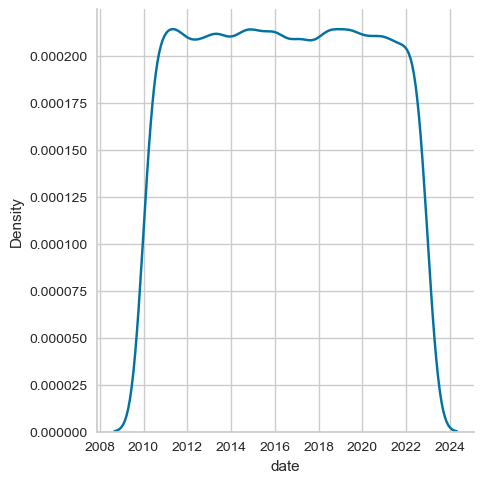

In [12]:
sns.displot(df, x='date', kind="kde")

### Nominal Data

In [13]:
df['user'].value_counts()

User_0269    71
User_0117    65
User_0057    65
User_0119    65
User_0734    64
             ..
User_0586    27
User_0150    25
User_0965    25
User_0453    23
User_0876    23
Name: user, Length: 1000, dtype: int64

In [14]:
df['pc'].value_counts()

PC_0272    117
PC_0480    115
PC_0069    115
PC_0045    114
PC_0354    113
          ... 
PC_0100     64
PC_0302     64
PC_0027     63
PC_0148     62
PC_0475     58
Name: pc, Length: 500, dtype: int64

<AxesSubplot:xlabel='Authority', ylabel='count'>

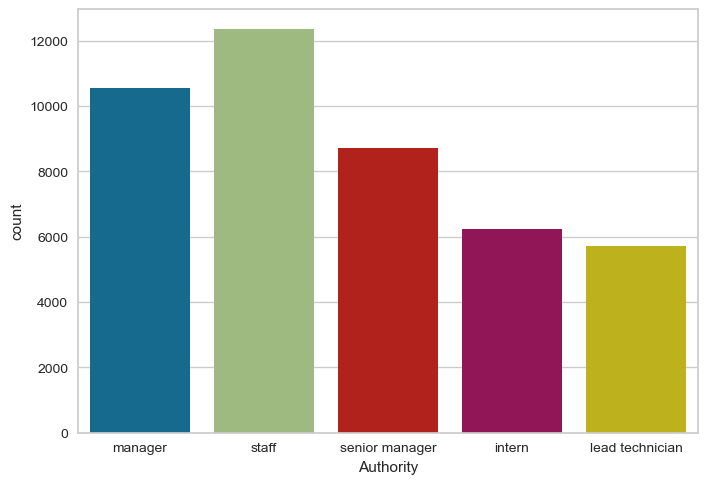

In [15]:
sns.countplot(data=df, x='Authority')

<AxesSubplot:xlabel='File Operation', ylabel='count'>

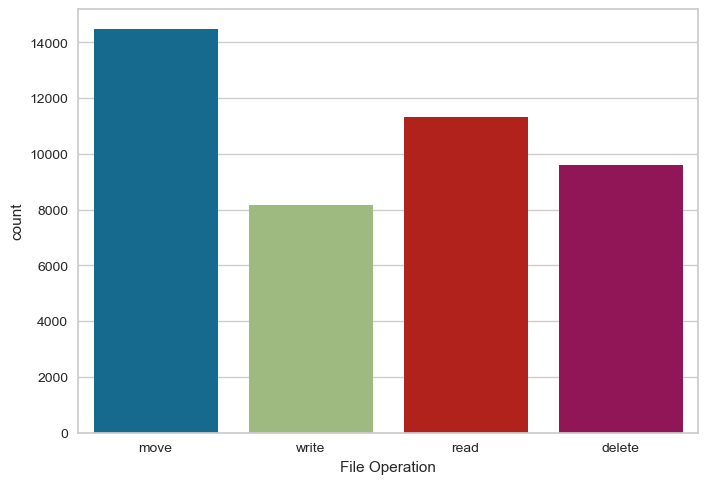

In [16]:
sns.countplot(data=df, x='File Operation')

### Ordinal Data

<AxesSubplot:xlabel='Data Sensitivity Level', ylabel='count'>

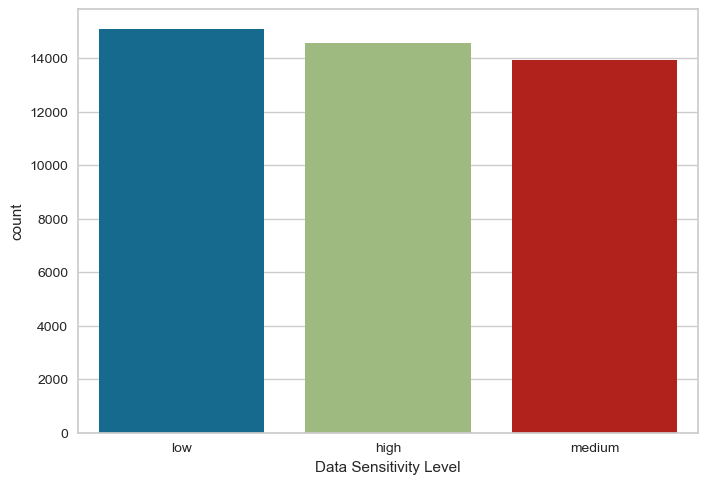

In [17]:
sns.countplot(data=df, x='Data Sensitivity Level')

### Binary data
- Through_pwd
- Through_pin
- Through_MFA
- Data Modification
- Confidential Data Access
- Confidential File Transfer
- External Destination
- Abnormality

In [18]:
df['External Destination'].value_counts(normalize=True)

internal    0.597337
external    0.402663
Name: External Destination, dtype: float64

In [19]:
(
    df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']]
    .apply(lambda col: col.value_counts(normalize=True), axis=0)
)

,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,Abnormality
0,0.729614,0.716827,0.512029,0.612144,0.666253,0.455257,0.687948
1,0.270386,0.283173,0.487971,0.387856,0.333747,0.544743,0.312052


## Multi-variate analysis

### Continuous data

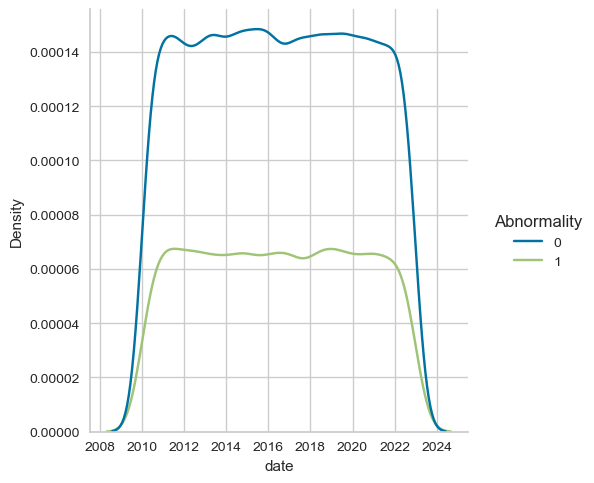

In [20]:
sns.displot(df, x='date', hue='Abnormality', kind="kde")

<AxesSubplot:xlabel='date', ylabel='Probability'>

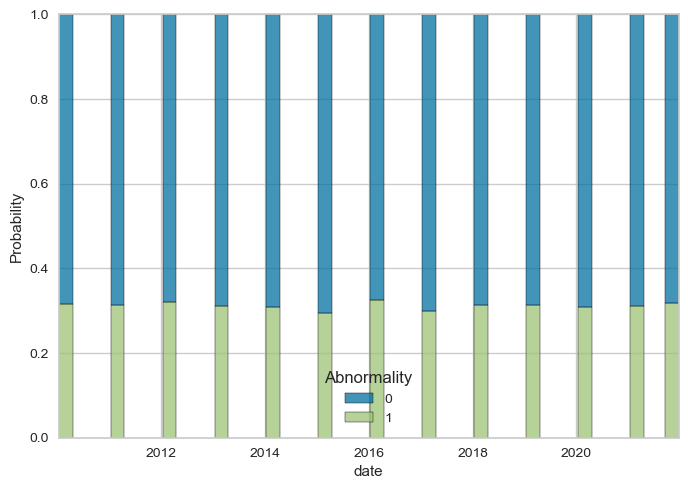

In [21]:
sns.histplot(df, x=df['date'].dt.year, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

<AxesSubplot:xlabel='date', ylabel='Probability'>

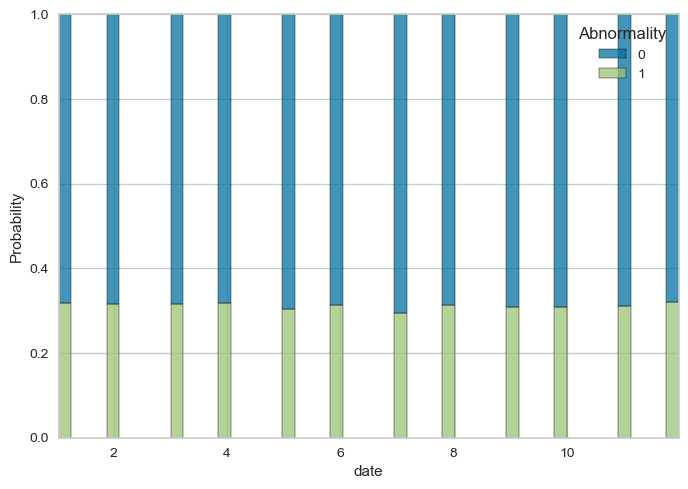

In [22]:
sns.histplot(df, x=df['date'].dt.month, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

<AxesSubplot:xlabel='date', ylabel='Probability'>

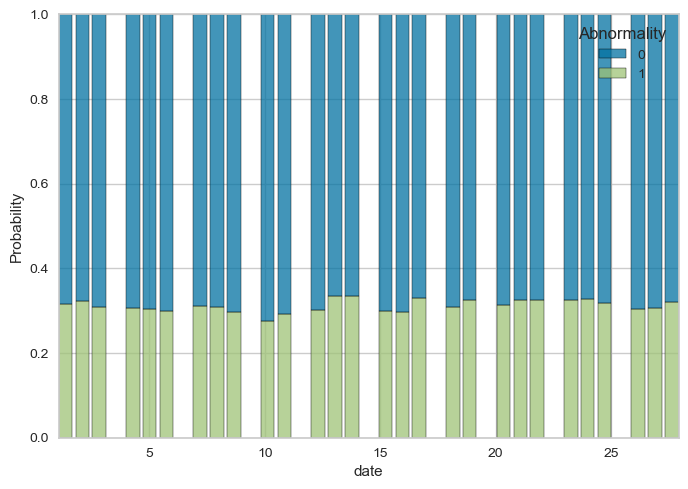

In [23]:
sns.histplot(df, x=df['date'].dt.day, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

<AxesSubplot:xlabel='date', ylabel='Probability'>

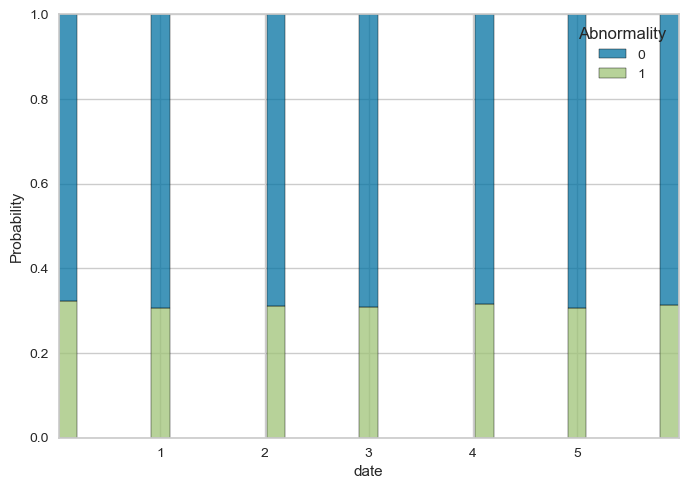

In [24]:
sns.histplot(df, x=df['date'].dt.dayofweek, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

<AxesSubplot:xlabel='date', ylabel='Probability'>

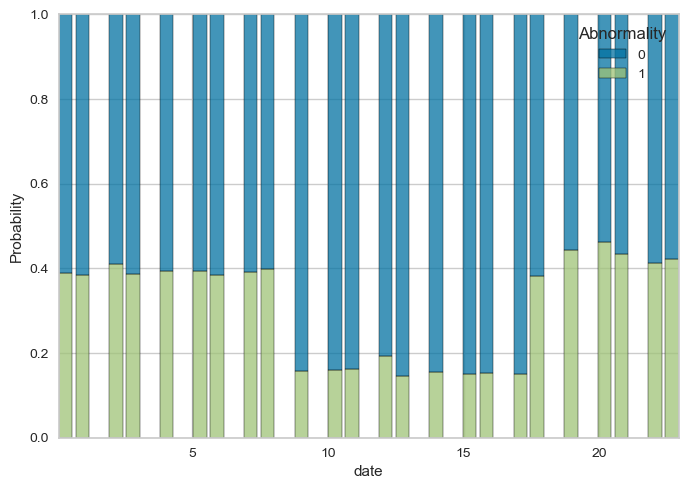

In [25]:
sns.histplot(df, x=df['date'].dt.hour, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

### Categorical data

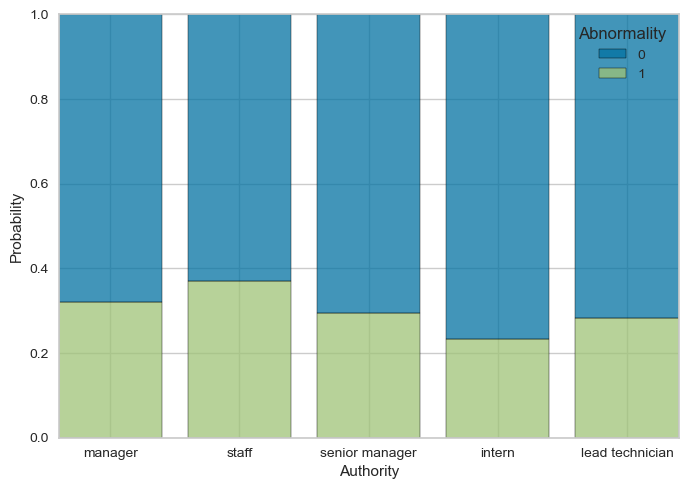

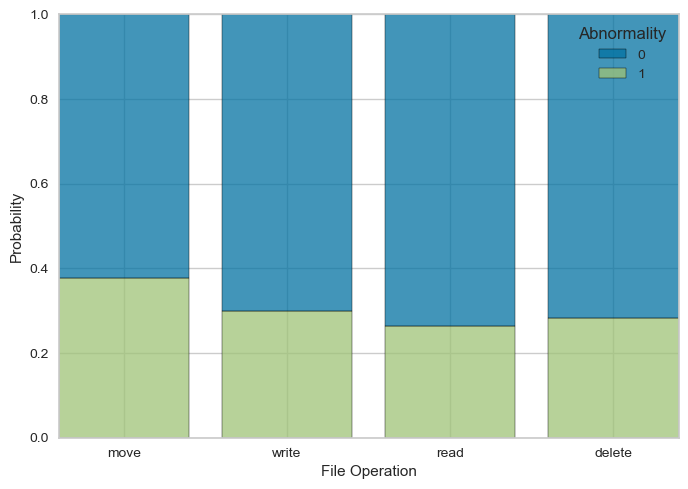

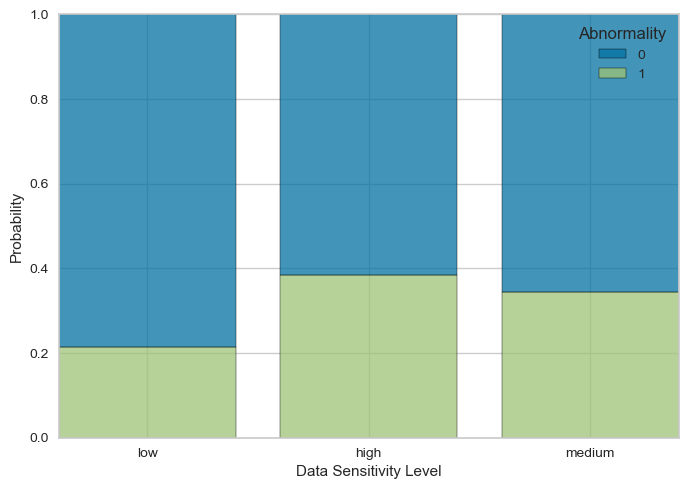

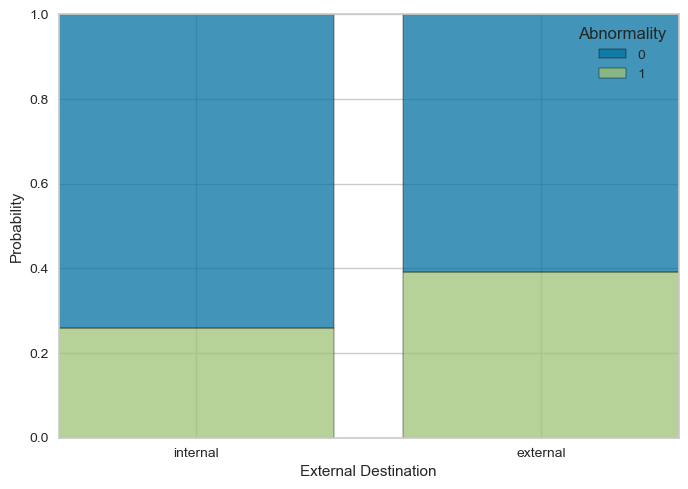

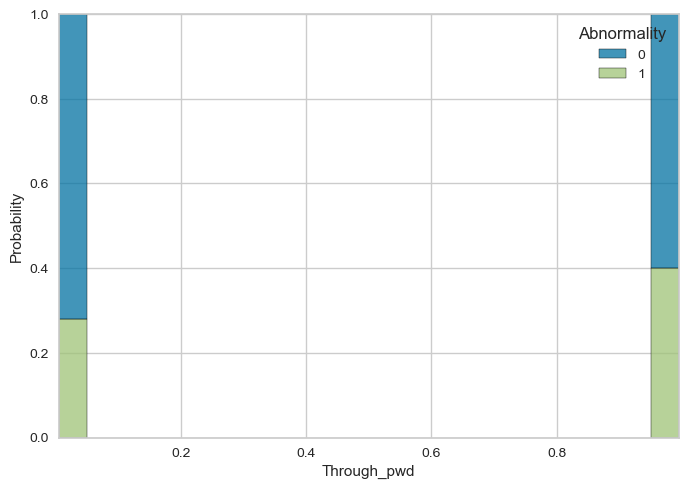

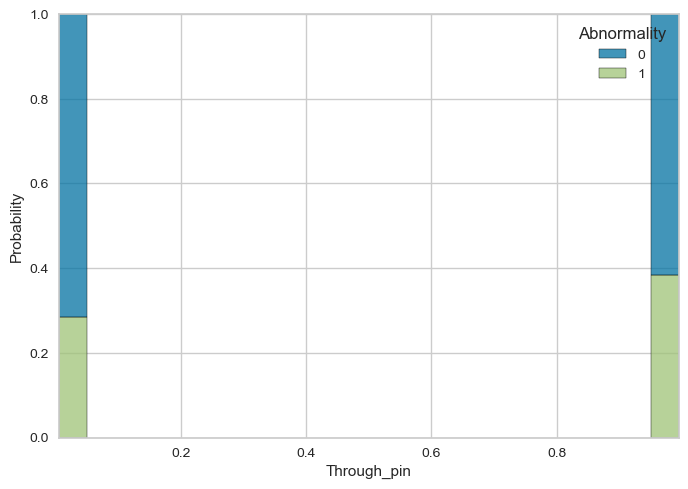

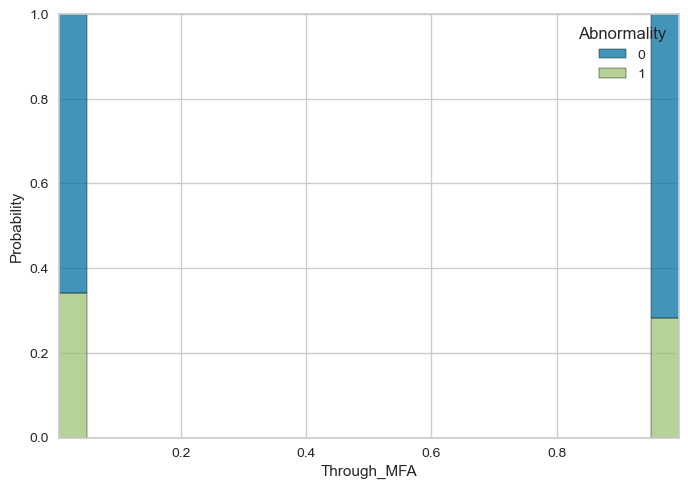

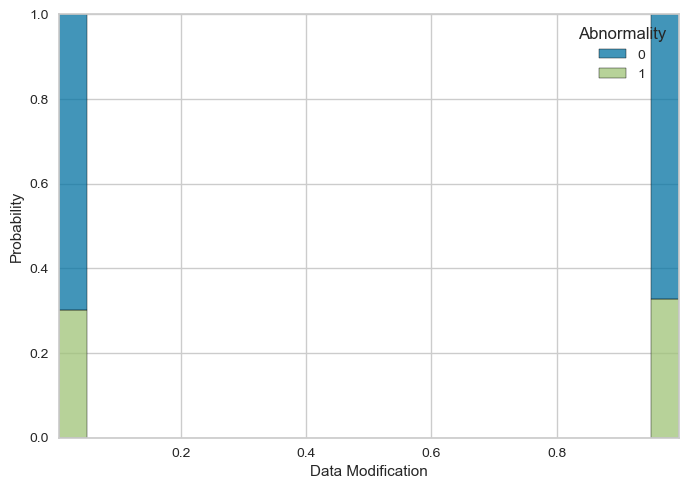

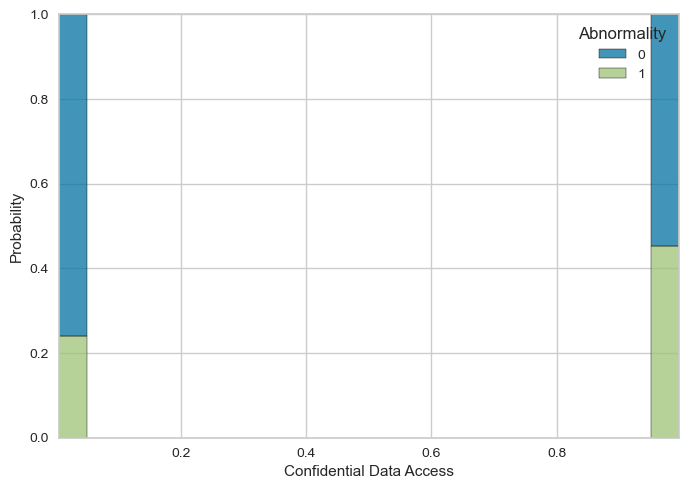

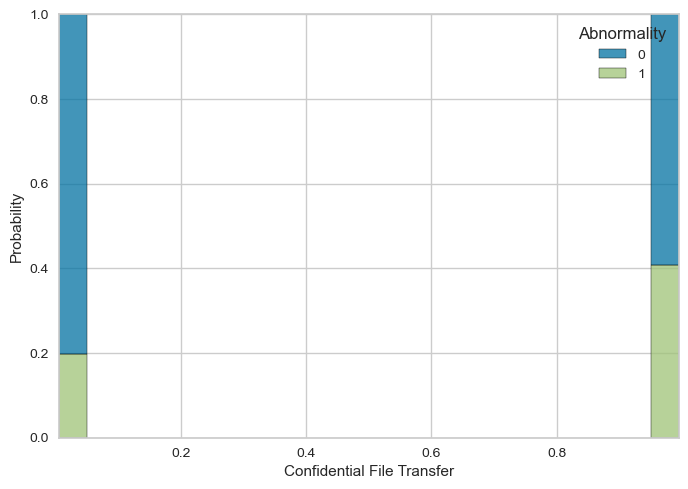

In [26]:
for col in ['Authority', 'File Operation', 'Data Sensitivity Level', 'External Destination', 'Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer']:
    plt.figure()
    sns.histplot(df, x=col, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

In [27]:
for col in ['Authority', 'File Operation', 'Data Sensitivity Level', 'External Destination', 'Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer']:
    display(pd.crosstab(df[col], df['Abnormality'], normalize='index'))

Abnormality,0,1
Authority,,
intern,0.766053,0.233947
lead technician,0.717791,0.282209
manager,0.679807,0.320193
senior manager,0.706031,0.293969
staff,0.628886,0.371114


Abnormality,0,1
File Operation,,
delete,0.717099,0.282901
move,0.623315,0.376685
read,0.737000,0.263000
write,0.700110,0.299890


Abnormality,0,1
Data Sensitivity Level,,
high,0.616472,0.383528
low,0.786387,0.213613
medium,0.656151,0.343849


Abnormality,0,1
External Destination,,
external,0.609236,0.390764
internal,0.741007,0.258993


Abnormality,0,1
Through_pwd,,
0,0.720848,0.279152
1,0.599168,0.400832


Abnormality,0,1
Through_pin,,
0,0.716221,0.283779
1,0.616376,0.383624


Abnormality,0,1
Through_MFA,,
0,0.658626,0.341374
1,0.718715,0.281285


Abnormality,0,1
Data Modification,,
0,0.697319,0.302681
1,0.673158,0.326842


Abnormality,0,1
Confidential Data Access,,
0,0.758735,0.241265
1,0.546636,0.453364


Abnormality,0,1
Confidential File Transfer,,
0,0.801220,0.198780
1,0.593282,0.406718


# Data Pre-processing

In [28]:
df['time'] = df['date'].dt.hour * 3600 + df['date'].dt.minute * 60 + df['date'].dt.second
scaler = StandardScaler()
df['time'] = scaler.fit_transform(df[['time']])

In [29]:
df = (
    df.drop(columns=['date'], axis=1)
    .drop(columns=['user'], axis=1)
    .drop(columns=['pc'], axis=1)
)

In [30]:
cat = ['Authority', 'External Destination', 'File Operation', 'Data Sensitivity Level']
# cat = ['user', 'pc', 'Authority', 'External Destination', 'File Operation', 'Data Sensitivity Level']


oh_enc = OneHotEncoder()
enc_data=pd.DataFrame(oh_enc.fit_transform(df[cat]).toarray())
enc_data

#Merge with main data using a function
def sklearn_ohe_design_matrix(X):
    ohe_cols = pd.DataFrame(oh_enc.transform(df[cat]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = df.index)
    
    return X.join(ohe_cols).drop(columns=cat, axis=1)

In [31]:
df_cleaned = sklearn_ohe_design_matrix(df).drop(columns=['Authority_intern', 'External Destination_internal', 'File Operation_delete', 'Data Sensitivity Level_low'], axis=1)
df_cleaned

,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,Abnormality,time,Authority_lead technician,Authority_manager,Authority_senior manager,Authority_staff,External Destination_external,File Operation_move,File Operation_read,File Operation_write,Data Sensitivity Level_high,Data Sensitivity Level_medium
0,0,0,1,0,0,1,0,-1.607517,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,0,1,0,0,1,0.885376,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,1,0,1,0,1.230138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,0,0,1,1,0,0.101827,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0,1,0,1,0,0,-0.373125,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,0,1,0,1,0,0,1,1.138523,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
49496,1,1,1,0,1,1,1,0.521327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49497,1,0,0,1,0,0,0,0.056019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
49498,0,0,1,1,1,1,1,0.596066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
var_ratio = []
nums = np.arange(18)

for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_cleaned.drop(columns=['Abnormality']))
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

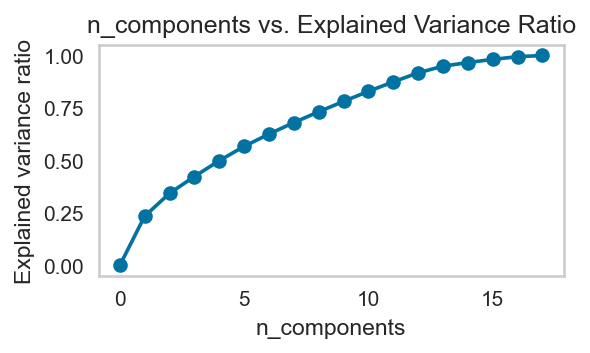

In [33]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [34]:
X = PCA(13).fit_transform(df_cleaned.drop(columns=['Abnormality']))

In [35]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned = pd.DataFrame(X).join(df_cleaned['Abnormality'])

# Modeling

Train-test Split

In [36]:
X_train, X_test, y_train, y_test = (
    train_test_split(df_cleaned.drop(columns=['Abnormality']), df_cleaned['Abnormality'], random_state=42, test_size=0.2)
)

## Logistic Regression Model

In [331]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [332]:
# Training accuracy.
logit.score(X_train, y_train)

0.702995867768595

In [333]:
# Testing accuracy.
logit.score(X_test, y_test)

0.7038567493112947

In [334]:
logit_pred = logit.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, logit_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      6082
           1       0.52      0.25      0.34      2630

    accuracy                           0.70      8712
   macro avg       0.63      0.57      0.57      8712
weighted avg       0.67      0.70      0.67      8712



## Decision Tree

In [335]:
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [336]:
dt_pred = dt.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6082
           1       0.55      0.47      0.51      2630

    accuracy                           0.72      8712
   macro avg       0.67      0.65      0.66      8712
weighted avg       0.71      0.72      0.72      8712



## Random Forest

Cross-Validation

In [42]:
model = RandomForestClassifier()

hyperparameters = {
    'n_estimators': [500], # number of trees per forest
    'max_depth': [10],     # max depth of each tree
    # 'max_features': ["sqrt"] # max number of features considered for splitting a node
}

grids = GridSearchCV(
    model,
    n_jobs=-1, # Use multiple processors to parallelize,
    param_grid=hyperparameters,
    cv=10 # 10-fold cross-validation
)
grids.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'n_estimators': [500]})

In [566]:
grids.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}

In [567]:
# Training accuracy.
grids.score(X_train, y_train)

0.811524334251607

In [568]:
# Testing accuracy.
grids.score(X_test, y_test)

0.7723829201101928

In [569]:
grid_pred = grids.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, grid_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6082
           1       0.67      0.48      0.56      2630

    accuracy                           0.77      8712
   macro avg       0.74      0.69      0.70      8712
weighted avg       0.76      0.77      0.76      8712



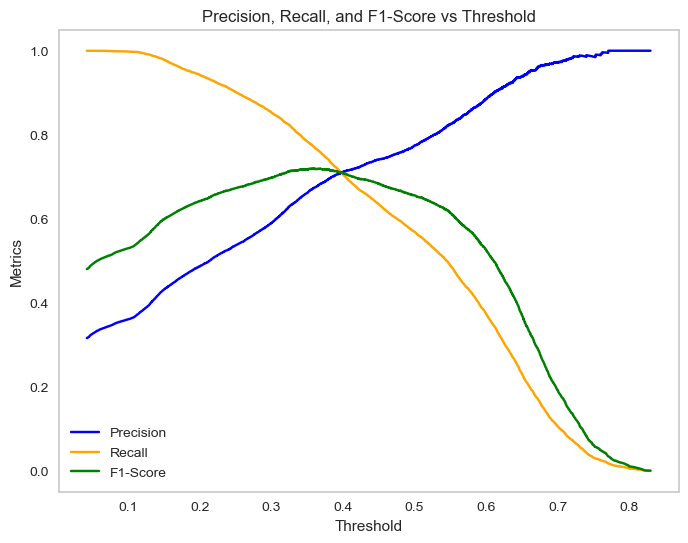

Best Threshold: 0.3584286661679419


In [44]:
y_prob = grids.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_threshold}")

In [45]:
y_pred = (svm_cv.predict_proba(X_test)[:,1] >= best_threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      6082
           1       0.53      0.73      0.61      2630

    accuracy                           0.72      8712
   macro avg       0.69      0.72      0.70      8712
weighted avg       0.76      0.72      0.73      8712



## SVM

In [ ]:
# param_grid = {'kernel': ['rbf'], 'class_weight': ['balanced']}

# svm_cv = SVC()

# grid_svm = GridSearchCV(
#     svm_cv,
#     n_jobs = -1, 
#     param_grid = param_grid,
#     cv=3
#     )
# grid_svm.fit(X_train, y_train)

In [37]:
svm_cv = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_cv.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [ ]:
grid_svm.best_params_

{'class_weight': 'balanced', 'kernel': 'rbf'}

In [710]:
grid_svm_pred = grid_svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, grid_svm_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      6082
           1       0.52      0.76      0.62      2630

    accuracy                           0.72      8712
   macro avg       0.70      0.73      0.70      8712
weighted avg       0.76      0.72      0.73      8712



In [ ]:
# Training accuracy.
grid_svm.score(X_train, y_train)

0.7318067033976124

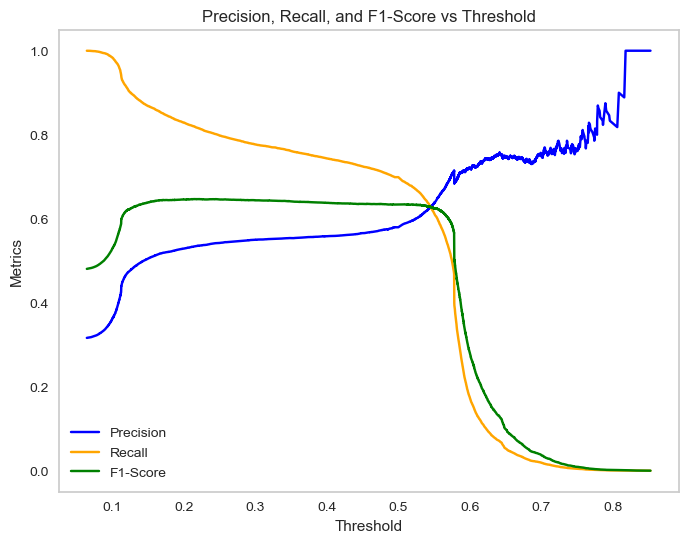

Best Threshold: 0.21414770304971703


In [39]:
y_prob = svm_cv.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_threshold}")

In [40]:
y_pred = (svm_cv.predict_proba(X_test)[:,1] >= best_threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      6082
           1       0.51      0.80      0.62      2630

    accuracy                           0.71      8712
   macro avg       0.70      0.73      0.69      8712
weighted avg       0.77      0.71      0.72      8712



In [ ]:
y_pred = (svm_cv.predict_proba(X_test)[:,1] >= 0.4).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      6082
           1       0.53      0.72      0.61      2630

    accuracy                           0.72      8712
   macro avg       0.69      0.72      0.70      8712
weighted avg       0.76      0.72      0.73      8712



## XGBoost

In [658]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [677]:
param_grid = {
    'max_depth': [3,4],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200],
    'subsample': [0.9]
    }

model_xgb = xgb.XGBClassifier()

grid_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='accuracy', cv=10)
grid_xgb.fit(X_train, y_train, sample_weight=classes_weights)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [704]:
grid_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}

In [705]:
grid_xgb_pred = grid_xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, model_xgb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      6082
           1       0.63      0.54      0.58      2630

    accuracy                           0.77      8712
   macro avg       0.72      0.70      0.71      8712
weighted avg       0.76      0.77      0.76      8712



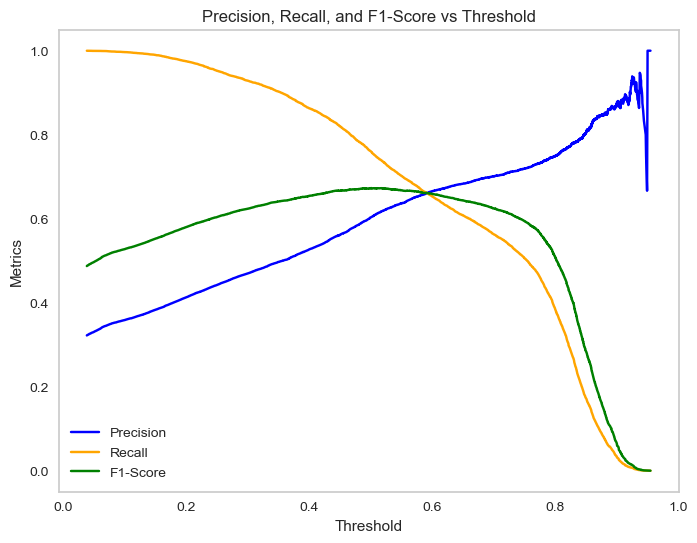

Best Threshold: 0.5017221570014954


In [706]:
y_prob = grid_xgb.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_threshold}")

In [707]:
y_pred = (grid_xgb.predict_proba(X_test)[:,1] >= best_threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      6082
           1       0.55      0.70      0.62      2630

    accuracy                           0.74      8712
   macro avg       0.70      0.73      0.71      8712
weighted avg       0.76      0.74      0.75      8712

